In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Get data

In [2]:
df = pd.read_csv('Ecommerce_Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

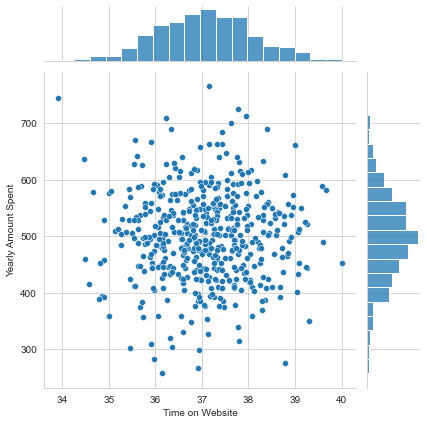

In [6]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df)

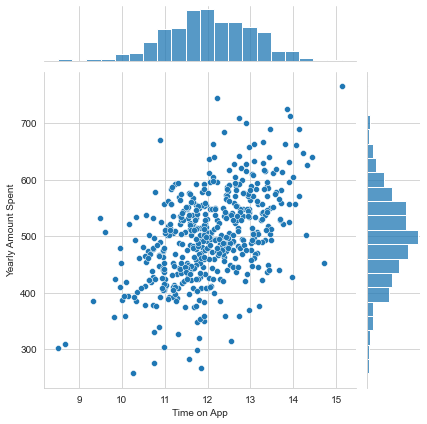

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df)

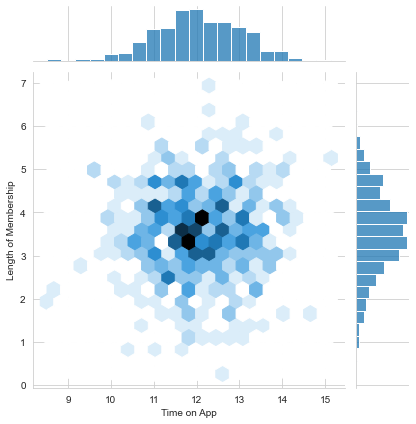

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

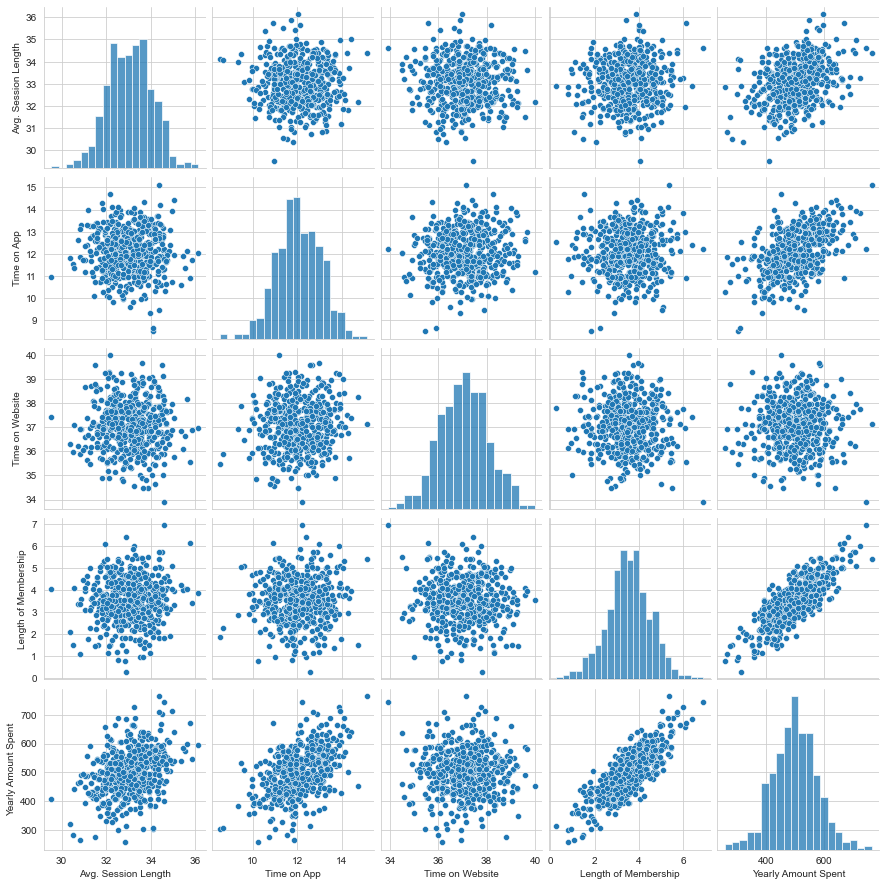

In [9]:
sns.pairplot(data=df)

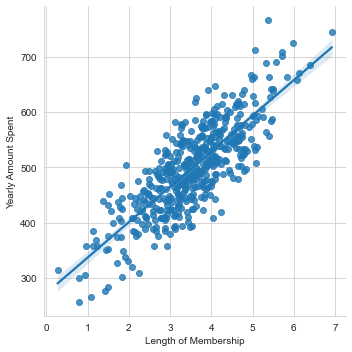

In [10]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

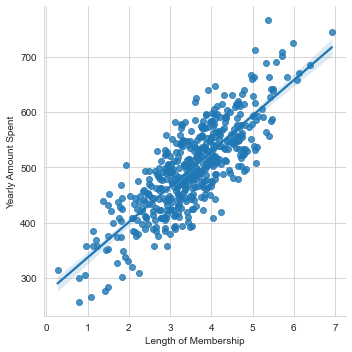

In [11]:
g = sns.FacetGrid(df, height=5)
g.map(sns.regplot, 'Length of Membership', 'Yearly Amount Spent')

## Train Test Split

In [7]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Training the Model

**Use the formula**

In [18]:
one = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((one, X_train), axis=1)
A = np.dot(X_train.T, X_train)
b = np.dot(X_train.T, y_train)
w = np.dot(np.linalg.pinv(A), b)

**Print out the coefficients of the model**

In [36]:
print(f'Intercept/Bias: \n {w[0]}')

Intercept/Bias: 
 -1047.9327822849496


In [19]:
print(f'Coefficients: \n {w[1:]}')

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data

In [20]:
one = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((one, X_test), axis=1)
predictions = np.dot(X_test, w)

Text(0, 0.5, 'Predicted values')

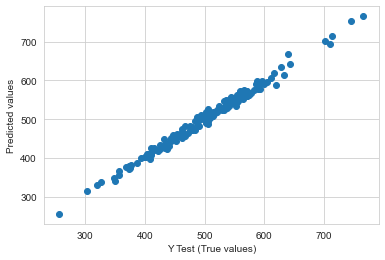

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted values')

## Evaluating the Model

In [22]:
from sklearn import metrics

In [23]:
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

MAE: 7.2281486534673
MSE: 79.81305165029822
RMSE: 8.933815066940786


In [24]:
metrics.explained_variance_score(y_test, predictions) # R2 score

0.9890771231890186

<AxesSubplot:ylabel='Count'>

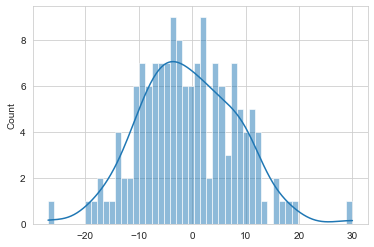

In [25]:
sns.histplot((y_test-predictions), kde=True, bins=50)

In [26]:
cdf = pd.DataFrame(w[1:], X.columns, columns=['Coeffecient'])
cdf

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
